# Planificación de trayectoria. Perfil trapezoidal

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
def trapezoidal_traj(distance,max_speed=10.0, acc=2.0, decc=1.0):
    traj = []
    
    dt_acc_phase = max_speed/acc
    dt_acc_phase = dt_acc_phase
    
    # Total distance travelled in acceleration phase
    dx_acc_phase = (acc*dt_acc_phase**2)/2.0
    
    dt_decc_phase = (0  - max_speed)/-decc
    #print("dt_decc_phase:",dt_decc_phase)

    # Total distance travelled in decceleration phase
    dx_decc_phase = (-decc*dt_decc_phase**2)/2.0 + max_speed*dt_decc_phase

    # Total distance travelled in acceleration and decceleration phases
    dx_acc_decc = dx_acc_phase + dx_decc_phase
    
    if distance <= dx_acc_decc:
        print("Case 1. Distance < dx_acc_decc")                
        dt = sqrt(distance/acc)        
        traj.append([ dt, "ramp_up", acc ])
        traj.append([ dt, "ramp_down", acc, distance/2.0,dt*acc])        
    else:    
        print("Case 2. Distance > dx_acc_decc")
        dx_constant_speed_phase = distance - dx_acc_decc - dx_decc_phase    
        dt_constant_speed_phase  = dx_constant_speed_phase / max_speed
        dt_constant_speed_phase = dt_constant_speed_phase

        traj.append([
            dt_acc_phase,
            "ramp_up",
            acc
        ])

        traj.append([
            dt_constant_speed_phase,
            "constant",
            dx_acc_phase,
            max_speed
        ])

        traj.append([
            dt_decc_phase,
            "ramp_down",
            decc,
            dx_acc_decc+dx_constant_speed_phase,
            max_speed
        ])

    return traj    

In [190]:
def ramp_up(t,acc):
    vel_profile=np.zeros(t.shape)
    x_profile=np.zeros(t.shape)
    vel_profile = acc*t
    x_profile =  (acc*t**2)/2.0
    return vel_profile,x_profile

def constant(t,initial_x,speed):
    vel_profile=np.zeros(t.shape)
    x_profile=np.zeros(t.shape)
    vel_profile = speed
    x_profile =  initial_x + speed*t
    return vel_profile,x_profile
    
def ramp_down(t,decc,initial_x,initial_speed):
    vel_profile=np.zeros(t.shape)
    x_profile=np.zeros(t.shape)
    vel_profile = -decc*t + initial_speed
    x_profile =  initial_x + (-decc*t**2)/2.0 + initial_speed*t
    return vel_profile,x_profile

In [191]:
def integrate_traj(traj):
    t_max = 0
    for s in traj:
        t_max += s[0] 
        
    t = np.arange(t_max+2)
    vel_profile = np.zeros(t.shape)
    x_profile = np.zeros(t.shape)        
    
    t_curr = 0
    for s in traj:
        dt = int(s[0])
        fn = globals()[s[1]]
        vel_profile[t_curr:(t_curr+dt)],x_profile[t_curr:(t_curr+dt)] = fn(t[:dt], *s[2:])
        t_curr += dt
        
    x_profile[t_curr:] = x_profile[t_curr-1]
        
    return t,vel_profile,x_profile

In [192]:
def plot_traj(t,vel_profile,x_profile ):
    plt.figure(figsize=[12,6])
    plt.plot(t,vel_profile)
    plt.plot(t,x_profile)
    plt.title("Trapezoidal Trajectory 1D")
    plt.grid(which='Both')
    plt.xlabel("t")
    plt.legend(["v(t)","x(t)"])

Case 2. Distance > dx_acc_decc
[[3.0, 'ramp_up', 1], [2.1666666666666665, 'constant', 4.5, 3], [3.0, 'ramp_down', 1.0, 15.5, 3]]


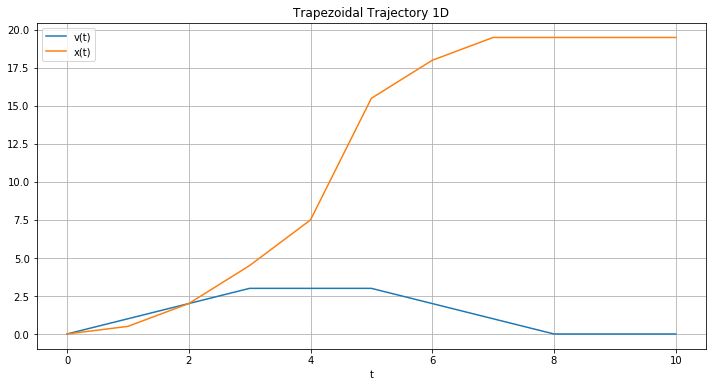

In [193]:
traj = trapezoidal_traj(distance=20.0,max_speed=3, acc=1, decc=1.0)
print(traj)

t,vel_profile,x_profile = integrate_traj(traj)

plot_traj(t,vel_profile,x_profile)

Case 1. Distance < dx_acc_decc
[[2.23606797749979, 'ramp_up', 1], [2.23606797749979, 'ramp_down', 1, 2.5, 2.23606797749979]]


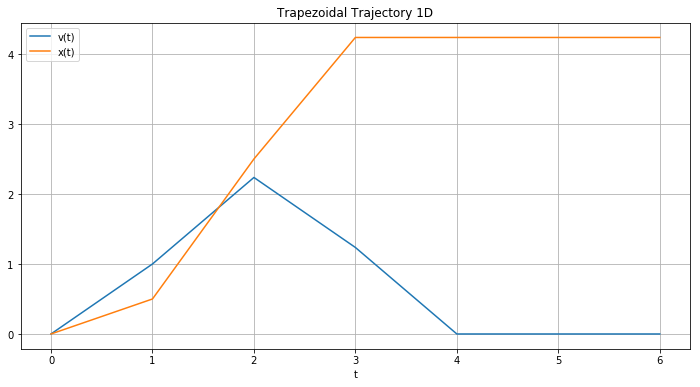

In [195]:
traj = trapezoidal_traj(distance=5.0,max_speed=3, acc=1, decc=1.0)
print(traj)

t,vel_profile,x_profile = integrate_traj(traj)
plot_traj(t,vel_profile,x_profile)